<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/classdemo/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import sklearn.cluster
import os
import urllib
%pylab inline
pl.style.use('ggplot')


Populating the interactive namespace from numpy and matplotlib


## generating random data:
## 2 gaussian distributions, differnt means, different stsndard deviations


9.8 8.5 1.1 1.6 


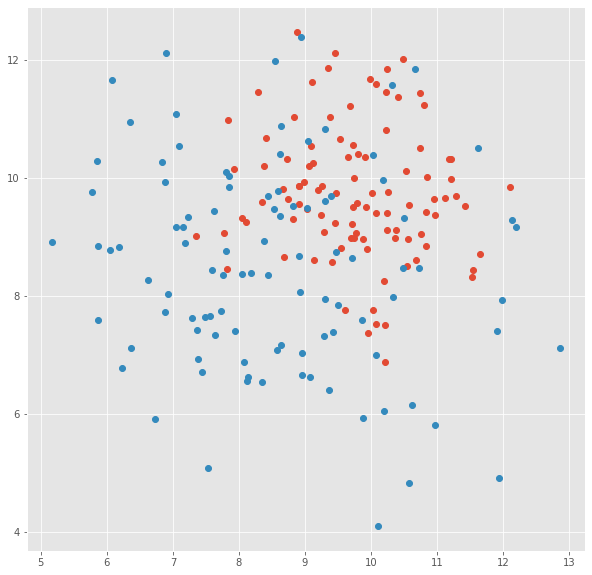

In [2]:
pl.figure(figsize = (10,10))
# seed for reporducibility
np.random.seed(1999)
#k1s, k1m = np.random.rand()*5, random.rand()*10 
##k2s, k2m = np.random.rand()*2.5, random.rand()*10
#
k1m, k2m, k1s, k2s = 9.8, 8.5, 1.1, 1.6
k1 = (k1s * np.random.randn(2, 100) + k1m).T
k2 = (k2s * np.random.randn(2, 100) + k2m).T
print ("{:.2} {:.2} {:.2} {:.2} ".format(k1m, k2m, k1s, k2s))
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')



## choose 2 random starting points: random locations within the distribution


In [3]:

np.random.seed(323)
x0, y0 = (max(k1[:,0]) + (min(k1[:,0])) / 2) * \
    np.random.rand(), (max(k1[:,1]) + (min(k1[:,1])) / 2) * \
    np.random.rand()
x1, y1 = (max(k2[:,0]) + (min(k2[:,0])) / 2)  * \
    np.random.rand(), (max(k2[:,1]) - (min(k2[:,1])) / 2) * \
    np.random.rand()

the true centers are: 15.36 1.76 13.96 9.05


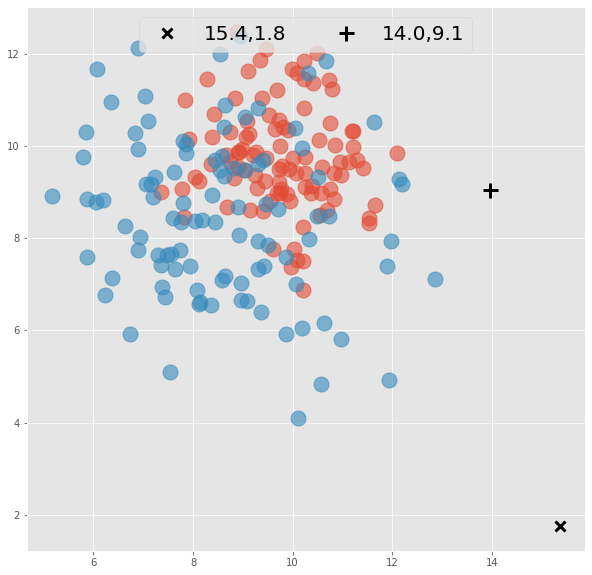

In [4]:
x_save = (x0,x1)
y_save = (y0,y1)

pl.figure(figsize = (10,10))
print ("the true centers are: {:.2f} {:.2f} {:.2f} {:.2f}".format(x0,y0,x1,y1))
pl.plot(k1[:,0], k1[:,1], 'o', ms = 15, alpha=0.6)
pl.plot(k2[:,0], k2[:,1], 'o', ms = 15, alpha=0.6)

pl.plot([x0], [y0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(x0,y0))
pl.plot([x1], [y1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(x1,y1))
pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)


## define a distance matric





In [5]:
#Eucledian distance
def dist (data, c):
    return (data[0]-c[0])**2 + (data[1]-c[1])**2


In [6]:
l1 = np.zeros(len(k1), int)
for i,k in enumerate(k1):
    l1[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
l2 = np.zeros(len(k2), int)
for i,k in enumerate(k2):
    l2[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1


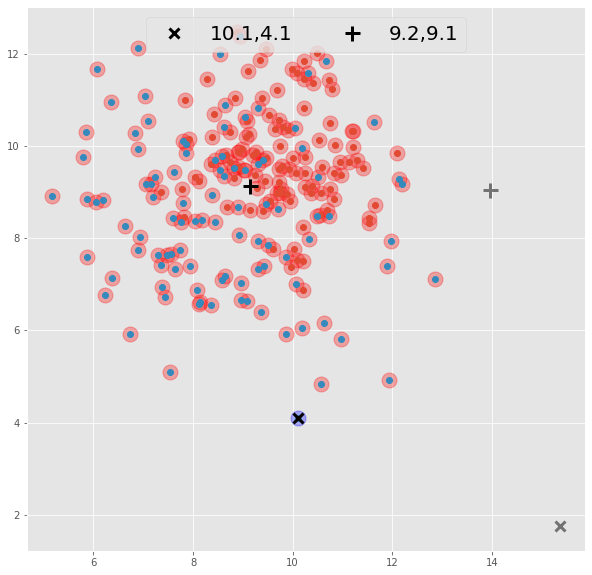

In [7]:
pl.figure(figsize = (10,10))

pl.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
pl.plot([x1], [y1], 'k+', ms = 15, mew=3, alpha=0.5)

pl.plot(k1[l1==0][:,0], k1[l1==0][:,1], 'bo', ms=15, alpha = 0.3)
pl.plot(k2[l2==0][:,0], k2[l2==0][:,1], 'bo', ms=15, alpha = 0.3)
pl.plot(k1[l1==1][:,0], k1[l1==1][:,1], 'ro', ms=15, alpha = 0.3)
pl.plot(k2[l2==1][:,0], k2[l2==1][:,1], 'ro', ms=15, alpha = 0.3)
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')

xnew0, ynew0 = np.mean(np.concatenate([k1[l1==0][:,0], 
                                       k2[l2==0][:,0]])), np.mean(np.concatenate([k1[l1==0][:,1], 
                                                                                  k2[l2==0][:,1]]))
xnew1, ynew1 = np.mean(np.concatenate([k1[l1==1][:,0], 
                                       k2[l2==1][:,0]])), np.mean(np.concatenate([k1[l1==1][:,1], 
                                                                                  k2[l2==1][:,1]]))
pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))
pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)



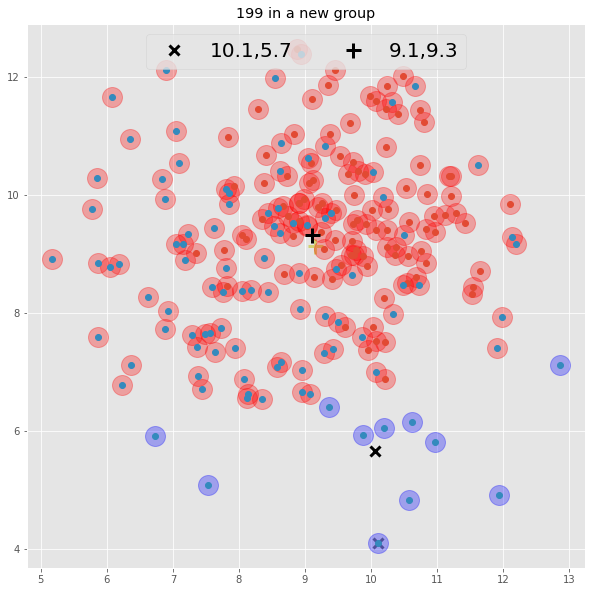

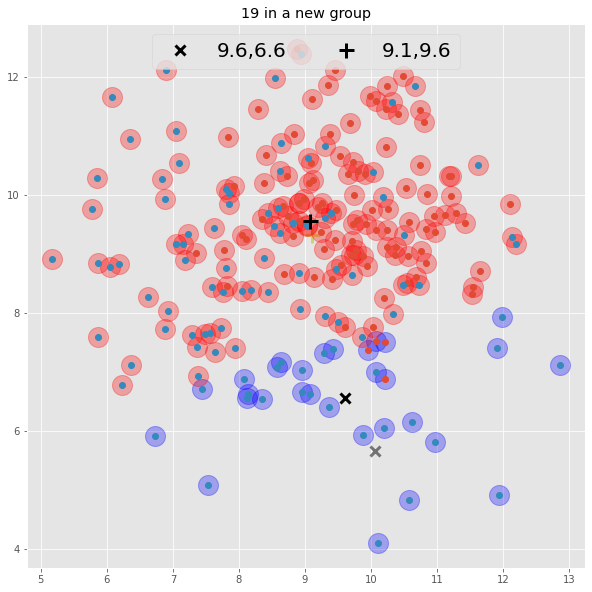

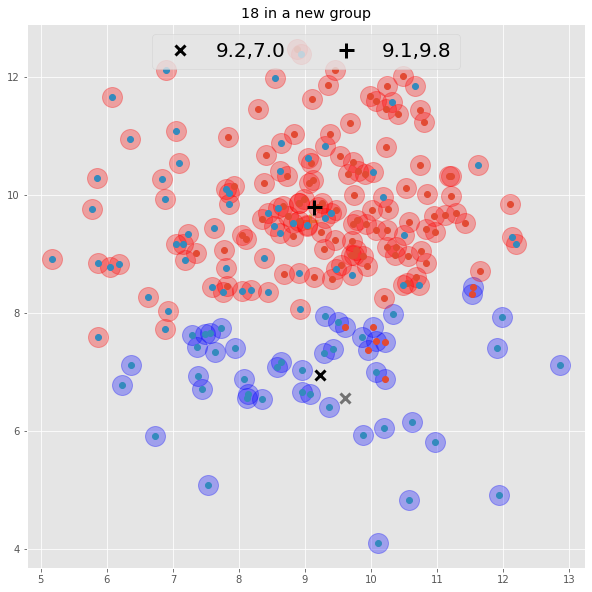

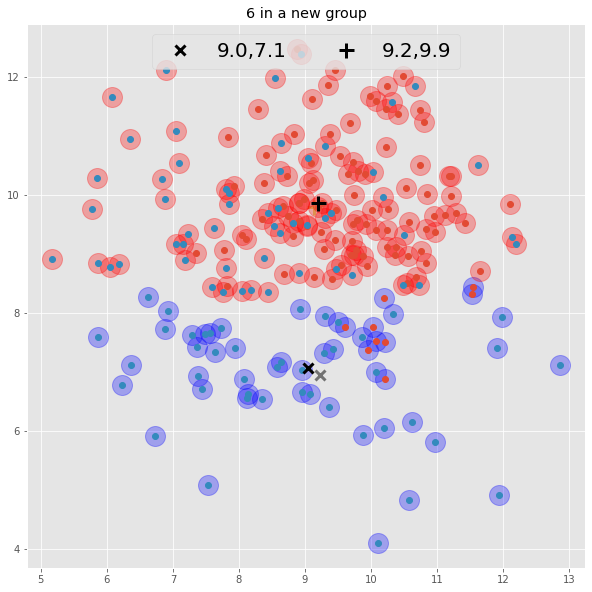

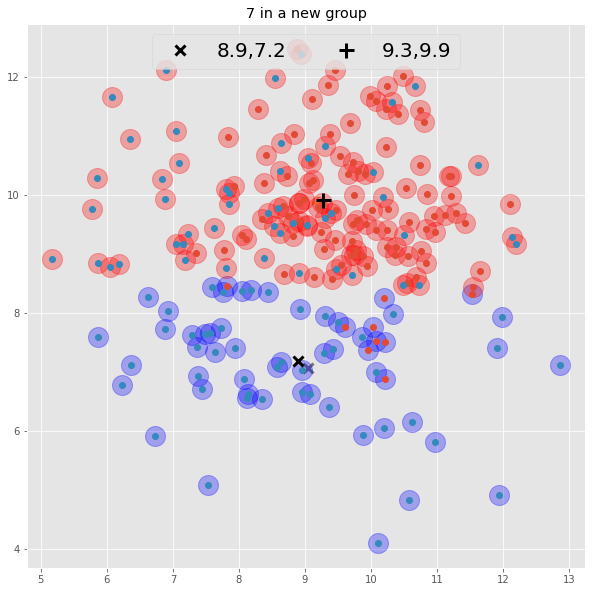

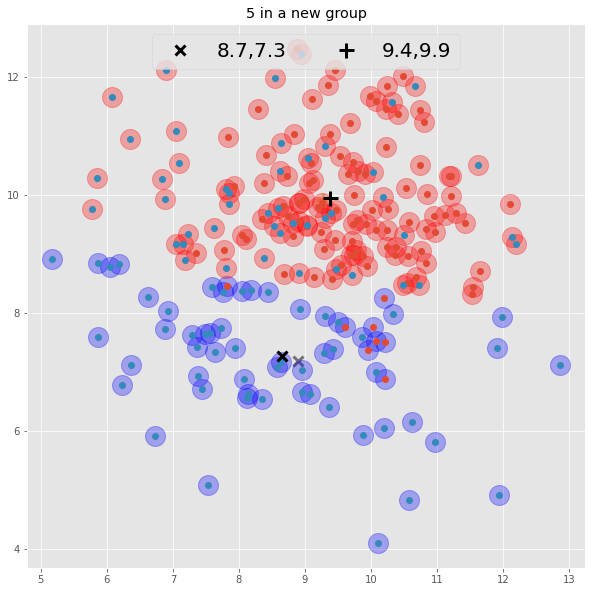

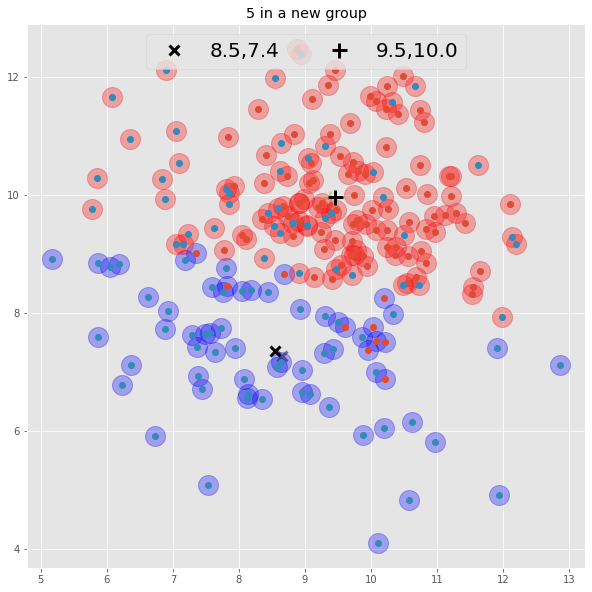

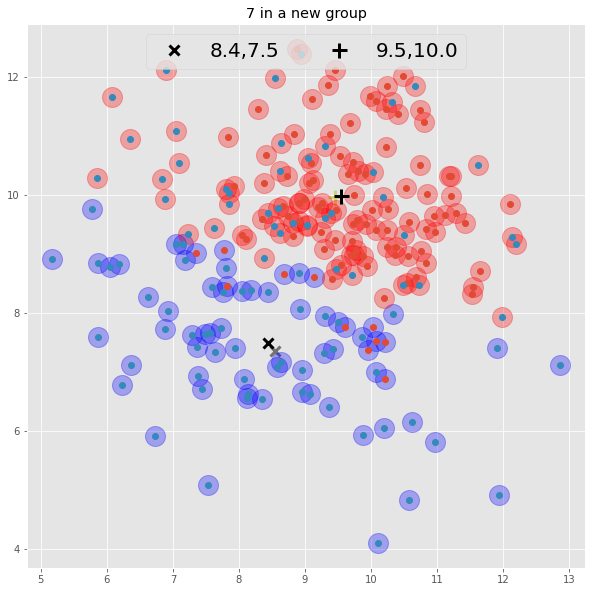

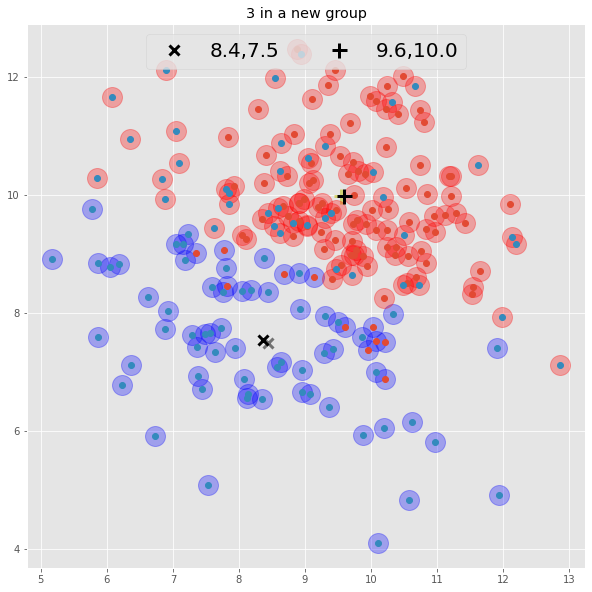

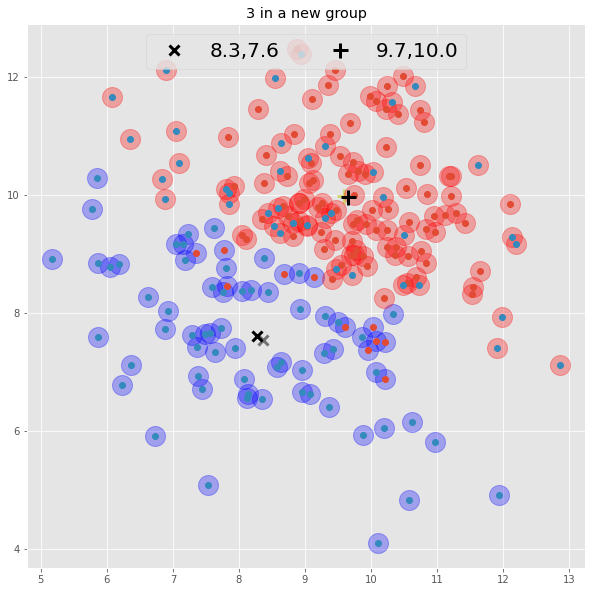

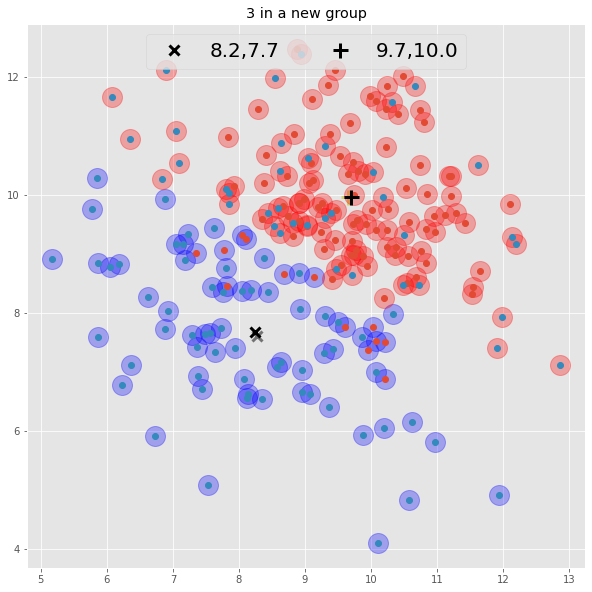

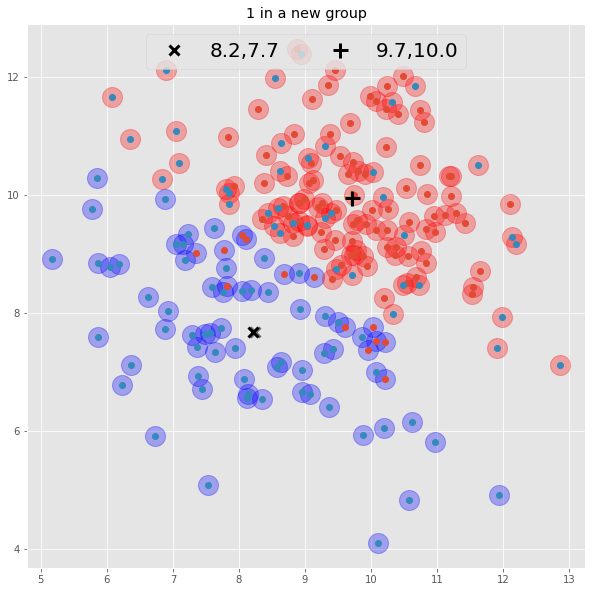

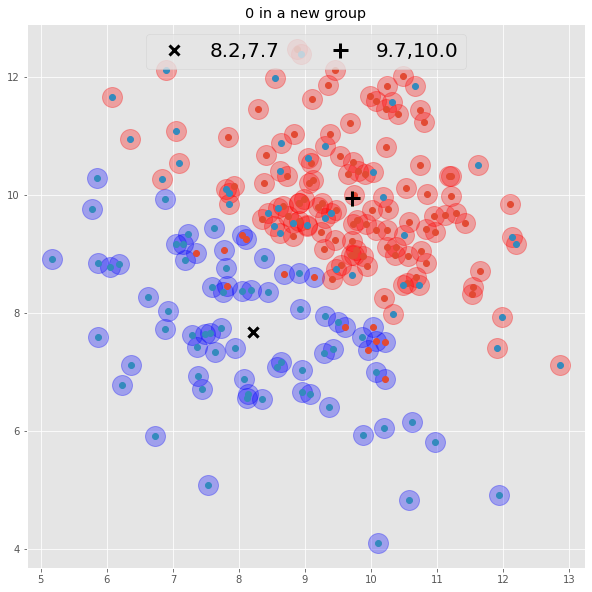

In [8]:
l1old = np.empty_like(l1)
l2old = np.empty_like(l2)

while not xnew0 == x0 or  not ynew0 == y0 or  not xnew1 == x1 or  not ynew1 == y1:
    pl.figure(figsize = (10,10))
    x0 = xnew0
    x1 = xnew1
    y0 = ynew0
    y1 = ynew1
    
    l1 = np.zeros(len(k1), int)
    for i,k in enumerate(k1):
        l1[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
    l2 = np.zeros(len(k2), int)
    for i,k in enumerate(k2):
        l2[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
        
        
    pl.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
    pl.plot([x1], [y1], 'y+', ms = 15, mew=3, alpha=0.5)

    pl.plot(k1[l1==0][:,0], k1[l1==0][:,1], 'bo', ms=20, alpha = 0.3)
    pl.plot(k2[l2==0][:,0], k2[l2==0][:,1], 'bo', ms=20, alpha = 0.3)
    pl.plot(k1[l1==1][:,0], k1[l1==1][:,1], 'ro', ms=20, alpha = 0.3)
    pl.plot(k2[l2==1][:,0], k2[l2==1][:,1], 'ro', ms=20, alpha = 0.3)
    pl.plot(k1[:,0], k1[:,1], 'o')
    pl.plot(k2[:,0], k2[:,1], 'o')

    xnew0, ynew0 = np.mean(np.concatenate([k1[l1==0][:,0], 
                                       k2[l2==0][:,0]])), np.mean(np.concatenate([k1[l1==0][:,1], 
                                                                                  k2[l2==0][:,1]]))
    xnew1, ynew1 = np.mean(np.concatenate([k1[l1==1][:,0], 
                                       k2[l2==1][:,0]])), np.mean(np.concatenate([k1[l1==1][:,1], 
                                                                                  k2[l2==1][:,1]]))
    pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
    pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))
    pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)
    pl.title("%d in a new group"%(sum(~(
                    l1old == l1))+sum(~(l2old == l2))))
    l1old = l1
    l2old = l2
    

In [9]:
print ("the original centers were:  %.1f %.1f, %.1f %.1f"%(x_save[0], y_save[0], 
                                                         x_save[1], y_save[1]))
print ("the new K-means center are: %.1f %.1f, %.1f %.1f"%(xnew0, ynew0, 
                                                         xnew1, ynew1))




the original centers were:  15.4 1.8, 14.0 9.1
the new K-means center are: 8.2 7.7, 9.7 10.0


In [10]:
print ("the original centers were:  %.1f %.1f, %.1f %.1f"%(x_save[0], y_save[0], 
                                                         x_save[1], y_save[1]))
print ("the new K-means center are: %.1f %.1f, %.1f %.1f"%(xnew0, ynew0, 
                                                         xnew1, ynew1))

the original centers were:  15.4 1.8, 14.0 9.1
the new K-means center are: 8.2 7.7, 9.7 10.0


# w sklearn

In [14]:
X = np.concatenate([k1, k2])
Xscale = sklearn.preprocessing.scale(X, axis=0 )

In [18]:
kmeansmod  = sklearn.cluster.KMeans(n_clusters=2).fit(X)

In [19]:
kmeansmod.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0], dtype=int32)

In [20]:
kmeansmod.cluster_centers_

array([[8.21785342, 7.68114744],
       [9.70822102, 9.95362275]])

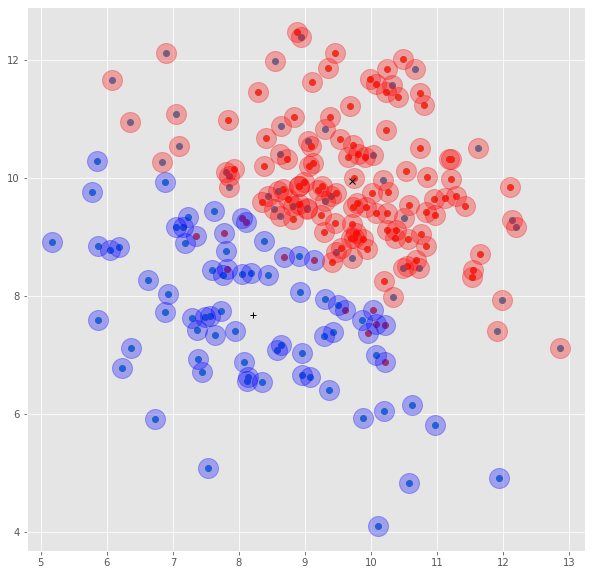

In [38]:
pl.figure(figsize = (10,10))
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')


pl.plot(X[kmeansmod.labels_ == 0][:,0], X[kmeansmod.labels_ == 0][:,1], 'bo', ms=20, alpha = 0.3)
pl.plot(X[kmeansmod.labels_ == 1][:,0], X[kmeansmod.labels_ == 1][:,1],'ro', ms=20, alpha = 0.3)
pl.plot(kmeansmod.cluster_centers_[1,0], kmeansmod.cluster_centers_[1,1], 'kx')
pl.plot(kmeansmod.cluster_centers_[0,0], kmeansmod.cluster_centers_[0,1], 'k+')


    

In [31]:
kmeansmod.cluster_centers_

array([[8.21785342, 7.68114744],
       [9.70822102, 9.95362275]])